In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [3]:
X=data.data
y=data.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred=lr.predict(X_test)

In [7]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.4526027629719197
42.79409467959994


In [8]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.001)

In [9]:
R.fit(X_train,y_train)
y_pred2=R.predict(X_test)

In [10]:
print(r2_score(y_test,y_pred2))
print(mean_absolute_error(y_test,y_pred2))

0.4534280301019331
42.803081786411205


In [11]:
print(R.coef_)

[  38.48350519 -241.35179512  543.83517889  346.78283074 -827.70199462
  437.17374869  116.94975277  260.75926436  696.1292235    49.7434469 ]


In [12]:
print(R.intercept_)

151.3419805679864


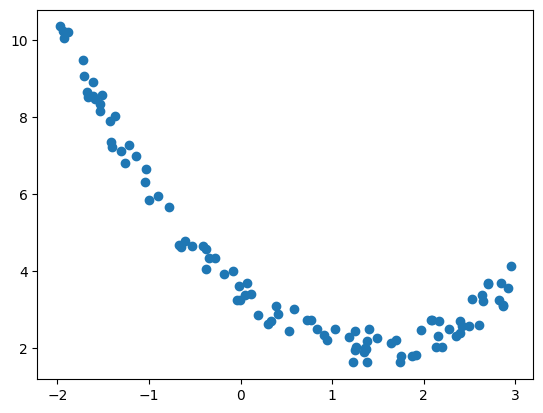

In [13]:
m=100
X1=5*np.random.rand(m,1)-2
X2=0.7*X1**2-2*X1+3+np.random.rand(m,1)
plt.scatter(X1,X2)
plt.show()

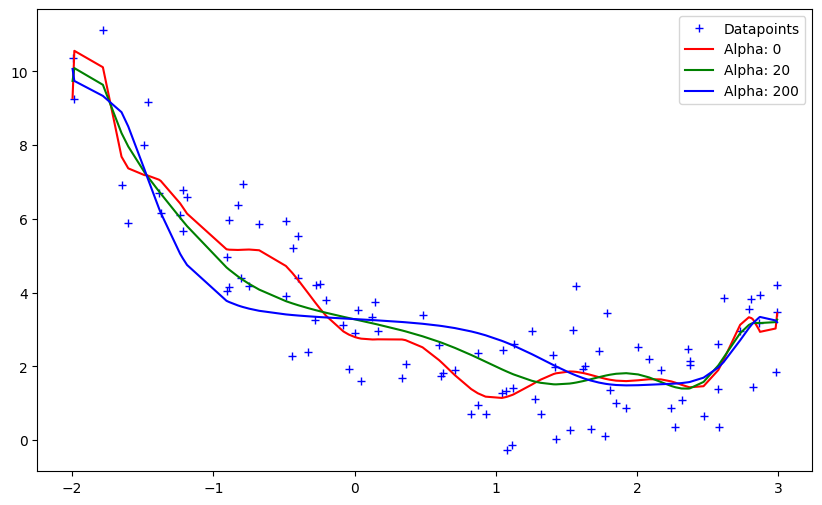

In [14]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()